#Problem

Project Description
In this mini project, you will develop a predictive maintenance system using machine
learning techniques. The goal is to predict machine failures based on sensor data from
industrial equipment. You will work with a dataset containing various sensor measurements
and use two different machine learning models of your choice.
Dataset
You will use the "AI4I 2020 Predictive Maintenance Dataset" from the UCI Machine Learning
Repository.
https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset
The dataset includes the following features:
• Air temperature [K]
• Process temperature [K]
• Rotational speed [rpm]
• Torque [Nm]
• Tool wear [min]
The target variable is 'Machine failure' (0 for no failure, 1 for failure).

In [28]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In next step, we will be taking a look on the dataset and check for any noises and clear it 

In [53]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
data = pd.read_csv(url)

print("Dataset info: ")
print(data.info())
data_modf= data.drop(columns= ['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float

To get an understanding of different features in the dataset we plot the correlation chart

Machine failure            1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64


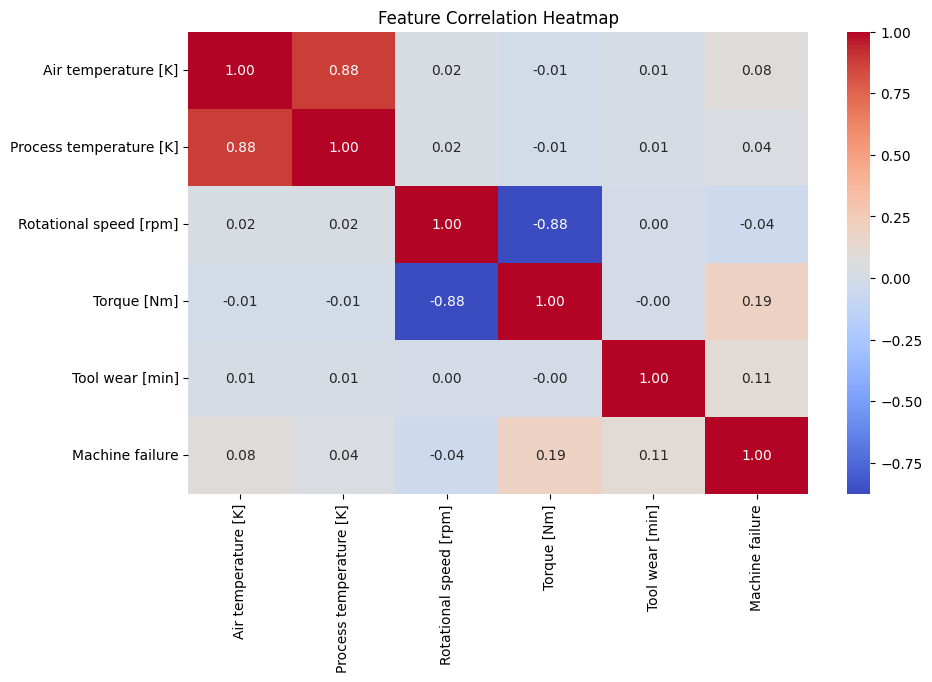

In [54]:

corr_matrix= data_modf.corr(numeric_only= True)
print(corr_matrix["Machine failure"].sort_values(ascending= False))

plt.figure(figsize=(10, 6))
sns.heatmap(data_modf.corr(numeric_only= True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Now we prepare the data for the input to model. Here we define the X, y values and split the data into 70% Training set and 30% Test set

In [55]:
X= data_modf.drop('Machine failure', axis=1)
y= data_modf["Machine failure"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Next we assign a model and try to fine tune it with cross validation  and later get its performance indicator

Cross-validation scores: [0.97214286 0.97357143 0.97357143 0.96785714 0.97142857]
Mean CV score: 0.97 (+/- 0.00)

Test set accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.85      0.24      0.37        93

    accuracy                           0.97      3000
   macro avg       0.91      0.62      0.68      3000
weighted avg       0.97      0.97      0.97      3000



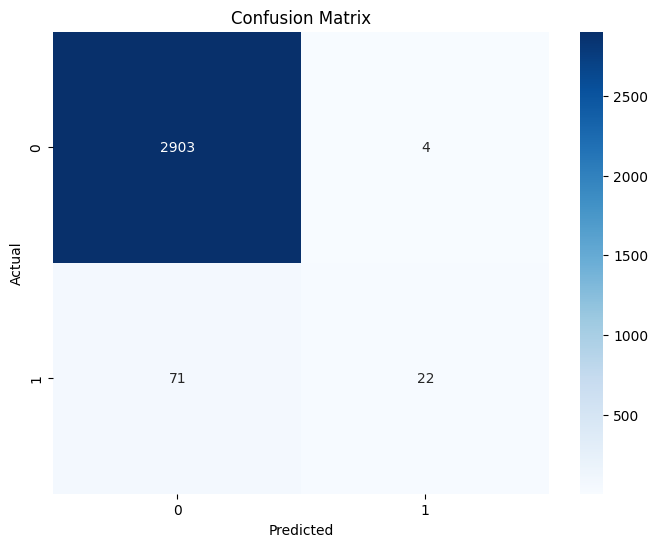

In [63]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest set accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

